In [992]:
from sklearn import datasets
X, Y = datasets.make_moons()
Y = Y.reshape(-1,1)
X.shape, Y.shape

((100, 2), (100, 1))

In [999]:
import numpy as np

class NN:
    
    def __init__(self, layers_dim):
        
        self.k = len(layers_dim) - 1
        self.layers = {} # Weights
        self.activations = {} # phi_(Z)
        self.Z = {} # A[L-1]W = > A[0] = X
        self.delta = {}
        for i,dim in enumerate(layers_dim):
            self.layers[i] = np.random.random(dim)
            self.activations[i] = []
            self.Z[i] = []
            self.delta[i] = {}
        
    def activate(self, Z):
        
        return (1/(1 + np.exp(-Z)))
        
    def feedforward(self, X):
        for layer in self.layers:
            # X => M, N
            # W_0 => N, 1
            # W_k-1 => k-2, k-1
            # W_k => k-1, k
            self.Z[0] = X @ self.layers[0]
            self.activations[0] = self.activate(self.Z[0])
            
            for i in range(1, len(self.layers)):
                self.Z[i] = self.activations[i-1] @ self.layers[i]
                self.activations[i] = self.activate(self.Z[i])
            
            return self.activations[self.k]
    
    def deriv_sig(self, A):
        return np.multiply(A, 1-A)
    
    def backprop(self, X, Y):
        
        Y_hat = self.activations[self.k]
        
        # Last layers delta , # BASE CASE
        self.delta[self.k] = Y_hat - Y
        for i in range(self.k-1, -1, -1):
            self.delta[i] =   np.multiply(self.delta[i+1] @ self.layers[i+1].T, self.deriv_sig(self.activations[i]))
                
    def loss(self, Y_hat, Y):
        return (-1) * ((Y * np.log(Y_hat)) + ((1-Y) * np.log(1-Y_hat)))
        
    def update(self, X, Y, lr):
        self.feedforward(X)
        Y_hat = self.activations[self.k]
        loss = self.loss(Y_hat, Y)
        print(" LOSS IS ", loss.mean())
        self.backprop(X, Y)
        self.activations[-1] = X
        for l in self.layers:
            prod = self.delta[l].T @ self.activations[l-1]

            self.layers[l] = self.layers[l] - lr * (prod.T)


            

In [1000]:
a = NN([(2,2),(2,4),(4,1)])

In [1001]:
a.layers

{0: array([[0.74552454, 0.09431367],
        [0.6981429 , 0.07307948]]),
 1: array([[0.87417187, 0.30621791, 0.49795891, 0.10505305],
        [0.21543946, 0.44839629, 0.51011633, 0.144016  ]]),
 2: array([[0.46317831],
        [0.043189  ],
        [0.18497   ],
        [0.02211509]])}

In [972]:
a.feedforward(X);

In [973]:
(a.activations[a.k] - Y).min()

-0.1616891737789119

In [974]:
a.activations[0].shape

(100, 2)

In [975]:
a.activations[2].shape

(100, 1)

In [976]:
a.activations[a.k].shape

(100, 1)

In [977]:
a.backprop(X, Y)

In [1002]:
a = NN([(2,20),(20,20),(20,1)])
for i in range(1000):
    a.update(X, Y, 1e-1)

 LOSS IS  5.0992153655514665
 LOSS IS  44.21473301313091
 LOSS IS  4.773053482631169
 LOSS IS  38.46250836022995
 LOSS IS  2.9302006326400982
 LOSS IS  22.441383625548468
 LOSS IS  1.5324849915835999
 LOSS IS  7.288133700006115
 LOSS IS  0.8283328905274351
 LOSS IS  0.5947083087479909
 LOSS IS  0.5347263422576667
 LOSS IS  0.5029393055843463
 LOSS IS  0.4878282068675965
 LOSS IS  0.4762386048652011
 LOSS IS  0.46552102495038383
 LOSS IS  0.4553490814801035
 LOSS IS  0.44552780186296964
 LOSS IS  0.43591367793077085
 LOSS IS  0.426391182303556
 LOSS IS  0.41685888091397316
 LOSS IS  0.40727378595338015
 LOSS IS  0.39756862223850986
 LOSS IS  0.387902502900933
 LOSS IS  0.3784211917715438
 LOSS IS  0.3709370537703925
 LOSS IS  0.36750979866179523
 LOSS IS  0.3884186645806797
 LOSS IS  0.4005271999410925
 LOSS IS  0.4959528141468479
 LOSS IS  0.38888420534243545
 LOSS IS  0.3598387085246931
 LOSS IS  0.32873093215779464
 LOSS IS  0.31620557344177086
 LOSS IS  0.3045349008296693
 LOSS IS  

[[3.66915168e-01]
 [8.56812981e-01]
 [9.83223612e-01]
 ...
 [1.08388930e-04]
 [2.22200672e-04]
 [6.01264239e-04]]


/var/folders/6v/9gb458t90k7dvc1hvl02dr4w0000gn/T/ipykernel_1190/3969722491.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


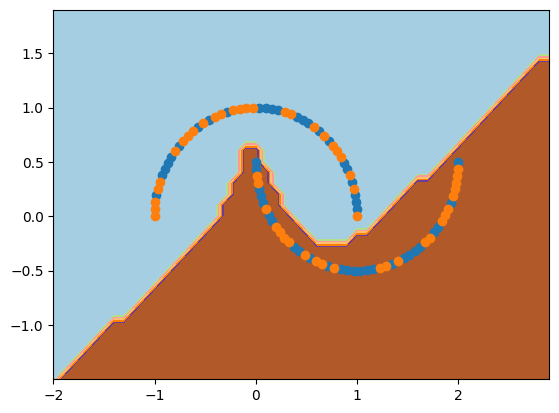

In [1003]:
plot_decision(a, X, 0.7)

In [751]:
import matplotlib.pyplot as plt
def plot_decision(classifier, X, threshold):
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    grid = np.hstack((r1,r2))
    
    yhat = classifier.feedforward(grid)
    print(yhat)
    yhat[yhat >= threshold] = 1
    yhat[yhat < threshold] = 0
    
    zz = yhat.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
    
        
def plot_decision_bias(classifier, X, threshold):
    min1, max1 = X[:, 1].min()-1, X[:, 1].max()+1
    min2, max2 = X[:, 2].min()-1, X[:, 2].max()+1
    
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    grid = np.hstack((r1,r2))
    
    yhat = classifier.predict_grid(grid)
    yhat[yhat >= threshold] = 1
    yhat[yhat < threshold] = 0
    
    zz = yhat.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 1], X[row_ix, 2], cmap='Paired')
        plt.scatter(0,0, s=20)